In [1]:
import pandas as pd

In [27]:
train_annot = pd.read_csv('../dataset/train_annotations.csv')
train = pd.read_csv('../dataset/train.csv')

In [28]:
train['has_annot'] = 0
train.loc[train['StudyInstanceUID'].isin(train_annot['StudyInstanceUID']), 'has_annot'] = 1

In [29]:
len(set(train['StudyInstanceUID']).intersection(set(train_annot['StudyInstanceUID'])))

9095

In [30]:
train

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,has_annot
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,0
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,0
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,1
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814,0
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30,0
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8,1
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d,1
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8,0


<AxesSubplot:>

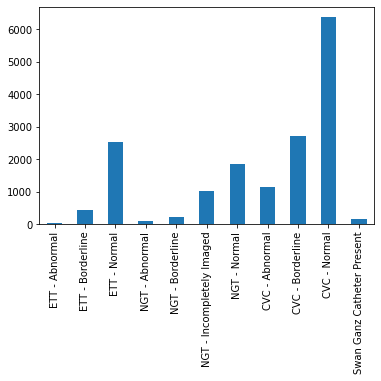

In [31]:
train[train['has_annot'] == 1].drop(['PatientID', 'StudyInstanceUID', 'has_annot'], axis=1).sum().plot(kind='bar')

<AxesSubplot:>

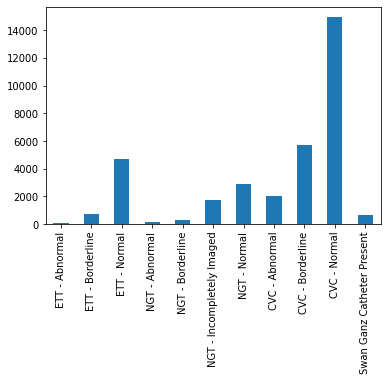

In [32]:
train[train['has_annot'] == 0].drop(['PatientID', 'StudyInstanceUID', 'has_annot'], axis=1).sum().plot(kind='bar')

<AxesSubplot:>

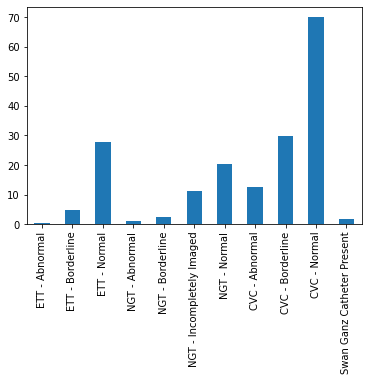

In [33]:
(train[train['has_annot'] == 1].drop(['PatientID', 'StudyInstanceUID', 'has_annot'], axis=1).sum() / len(train[train['has_annot'] == 1]) * 100).plot(kind='bar')

<AxesSubplot:>

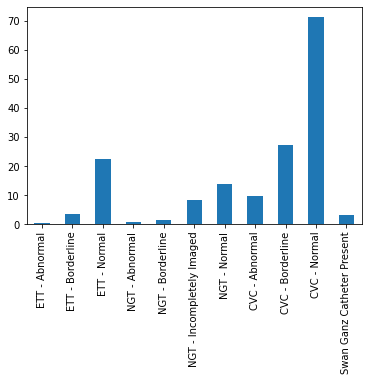

In [34]:
(train[train['has_annot'] == 0].drop(['PatientID', 'StudyInstanceUID', 'has_annot'], axis=1).sum() / len(train[train['has_annot'] == 0]) * 100).plot(kind='bar')

# venn diagrams

In [8]:
from venn import generate_petal_labels, draw_venn, generate_colors
import numpy as np

In [9]:
train.columns

Index(['StudyInstanceUID', 'ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present',
       'PatientID', 'has_annot'],
      dtype='object')

<AxesSubplot:>

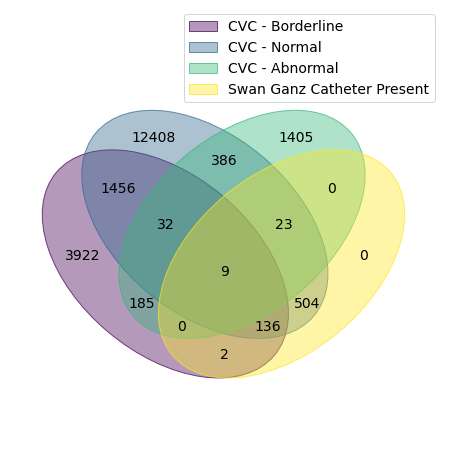

In [10]:
train_w_ann = train[train['has_annot'] == 0]

ett = set(np.where(train_w_ann['CVC - Borderline'] == True, train_w_ann.index.values, None).tolist())
ngt = set(np.where(train_w_ann['CVC - Normal'] == True, train_w_ann.index.values, None).tolist())
cvc = set(np.where(train_w_ann['CVC - Abnormal'] == True, train_w_ann.index.values, None).tolist())
incompletely_imaged = set(np.where(train_w_ann['Swan Ganz Catheter Present'] == True, train_w_ann.index.values, None).tolist())

venn_dataset_dict = {'CVC - Borderline': ett, 'CVC - Normal': ngt, 
                     'CVC - Abnormal': cvc, 'Swan Ganz Catheter Present': incompletely_imaged}

petal_labels = generate_petal_labels(venn_dataset_dict.values(), fmt="{size}")

draw_venn(
    petal_labels=petal_labels, dataset_labels=venn_dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

<AxesSubplot:>

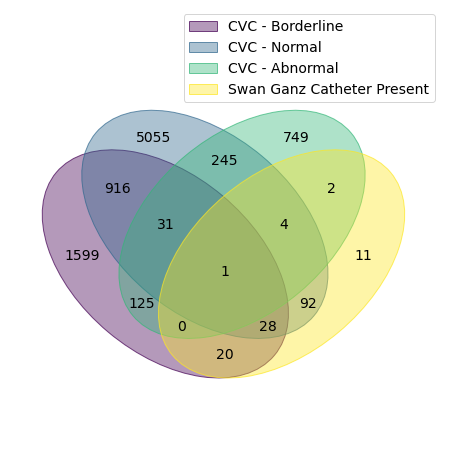

In [11]:
train_w_ann = train[train['has_annot'] == 1]

ett = set(np.where(train_w_ann['CVC - Borderline'] == True, train_w_ann.index.values, None).tolist())
ngt = set(np.where(train_w_ann['CVC - Normal'] == True, train_w_ann.index.values, None).tolist())
cvc = set(np.where(train_w_ann['CVC - Abnormal'] == True, train_w_ann.index.values, None).tolist())
incompletely_imaged = set(np.where(train_w_ann['Swan Ganz Catheter Present'] == True, train_w_ann.index.values, None).tolist())

venn_dataset_dict = {'CVC - Borderline': ett, 'CVC - Normal': ngt, 
                     'CVC - Abnormal': cvc, 'Swan Ganz Catheter Present': incompletely_imaged}

petal_labels = generate_petal_labels(venn_dataset_dict.values(), fmt="{size}")

draw_venn(
    petal_labels=petal_labels, dataset_labels=venn_dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

<AxesSubplot:>

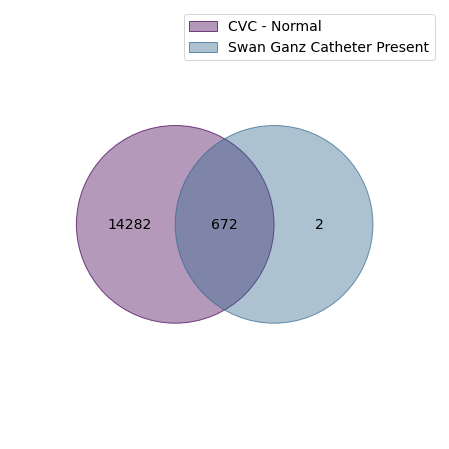

In [12]:
train_w_ann = train[train['has_annot'] == 0]

ngt = set(np.where(train_w_ann['CVC - Normal'] == True, train_w_ann.index.values, None).tolist())
incompletely_imaged = set(np.where(train_w_ann['Swan Ganz Catheter Present'] == True, train_w_ann.index.values, None).tolist())

venn_dataset_dict = {'CVC - Normal': ngt, 'Swan Ganz Catheter Present': incompletely_imaged}

petal_labels = generate_petal_labels(venn_dataset_dict.values(), fmt="{size}")

draw_venn(
    petal_labels=petal_labels, dataset_labels=venn_dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

<AxesSubplot:>

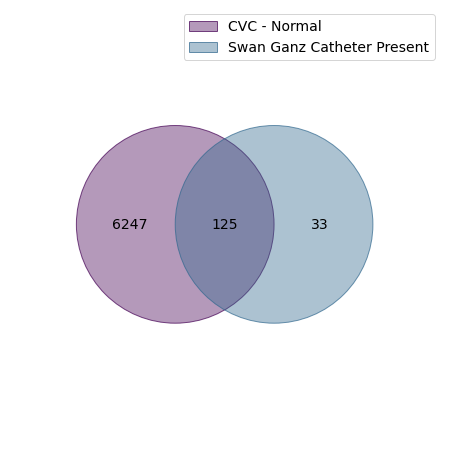

In [13]:
train_w_ann = train[train['has_annot'] == 1]

ngt = set(np.where(train_w_ann['CVC - Normal'] == True, train_w_ann.index.values, None).tolist())
incompletely_imaged = set(np.where(train_w_ann['Swan Ganz Catheter Present'] == True, train_w_ann.index.values, None).tolist())

venn_dataset_dict = {'CVC - Normal': ngt, 'Swan Ganz Catheter Present': incompletely_imaged}

petal_labels = generate_petal_labels(venn_dataset_dict.values(), fmt="{size}")

draw_venn(
    petal_labels=petal_labels, dataset_labels=venn_dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

# ratio by labels

In [15]:
train = pd.read_csv('../dataset/train_with_image_info.csv')

In [19]:
train['ratio'] = train['h'] / train['w']

In [20]:
train.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,h,w,area,ratio
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,2048,2500,5120000,0.819200
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,2048,2500,5120000,0.819200
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,2493,2526,6297318,0.986936
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814,2544,3056,7774464,0.832461
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1,2048,2500,5120000,0.819200


In [22]:
train.columns

Index(['StudyInstanceUID', 'ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present',
       'PatientID', 'h', 'w', 'area', 'ratio'],
      dtype='object')

In [25]:
for colname in ['ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']:
    print(colname, '\n', train[train[colname] == 1]['ratio'].describe(), '\n')

ETT - Abnormal 
 count    79.000000
mean      0.859200
std       0.112917
min       0.818063
25%       0.819200
50%       0.819200
75%       0.832461
max       1.220703
Name: ratio, dtype: float64 

ETT - Borderline 
 count    1138.000000
mean        0.844285
std         0.087339
min         0.708115
25%         0.819200
50%         0.819200
75%         0.832461
max         1.220703
Name: ratio, dtype: float64 

ETT - Normal 
 count    7240.000000
mean        0.837463
std         0.068147
min         0.688482
25%         0.819200
50%         0.819200
75%         0.832461
max         1.310463
Name: ratio, dtype: float64 

NGT - Abnormal 
 count    279.000000
mean       0.863700
std        0.109408
min        0.767016
25%        0.819200
50%        0.819200
75%        0.832461
max        1.220703
Name: ratio, dtype: float64 

NGT - Borderline 
 count    529.000000
mean       0.867158
std        0.113809
min        0.803665
25%        0.819200
50%        0.819200
75%        0.832461
max  